In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [4]:
class Predictor:
    def __init__(self, time, prices):
        self.time = time
        self.prices = prices
        self.data = pd.DataFrame({"Time": time, "Price": prices})
        self.model = None
        self.encoded_time = None

    def standar(self):
        encoder = OneHotEncoder(sparse_output=False)
        self.encoded_time = encoder.fit_transform(self.data[['Time']])
        self.data['Time_Numeric'] = range(len(self.time))

    def learn(self):
        X = self.data[['Time_Numeric']].values
        y = self.data['Price'].values

        self.model = LinearRegression()
        self.model.fit(X, y)

    def getParameters(self):
        if self.model is None:
            raise ValueError("Model chưa được huấn luyện. Vui lòng gọi hàm 'learn()' trước.")
        a = self.model.coef_[0]
        b = self.model.intercept_
        return a, b

    def plotData(self):
        plt.figure(figsize=(8, 6))
        plt.plot(self.data['Time_Numeric'], self.data['Price'], color='blue')
        plt.title("Biểu đồ biến động giá")
        plt.xlabel("Mốc thời gian")
        plt.ylabel("Mức giá")
        plt.legend()
        plt.show()

    def plotRegression(self):
        a, b = self.getParameters()
        x_values = self.data['Time_Numeric']
        y_values = a * x_values + b

        plt.figure(figsize=(8, 6))
        plt.plot(x_values, self.data['Price'], color='blue')
        plt.plot(x_values, y_values, color='red')

        plt.annotate('', xy=(x_values.iloc[-1], y_values.iloc[-1]), xytext=(x_values.iloc[0], y_values.iloc[0]),
                     arrowprops=dict(facecolor='yellow', width=2, headwidth=10),
                     label="Mũi tên")
        plt.xlabel("Mốc thời gian")
        plt.ylabel("Giá nhà")
        plt.legend()
        plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3152\1120757184.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


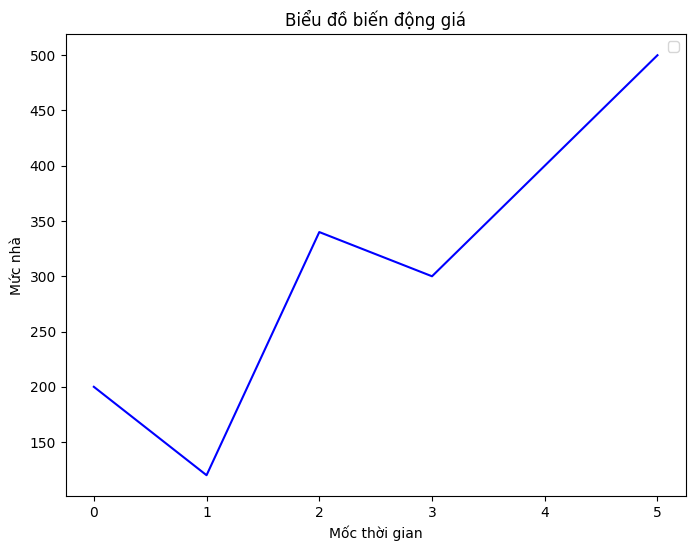

C:\Users\DELL\AppData\Local\Temp\ipykernel_3152\1120757184.py:51: UserWarning: Legend does not support handles for Annotation instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
C:\Users\DELL\AppData\Local\Temp\ipykernel_3152\1120757184.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


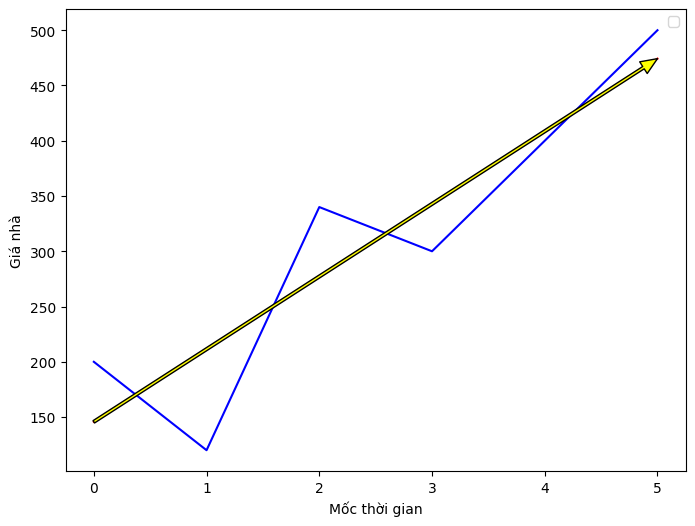

In [3]:
# Dữ liệu mẫu
time_data = ['T10/22', 'T11/22', 'T12/22', 'T01/23', 'T02/23', 'T03/23']
house_prices = [200, 120, 340, 300, 400, 500]

# Tạo đối tượng Predictor
predictor = Predictor(time_data, house_prices)

# Chuẩn hóa dữ liệu
predictor.standar()

# Huấn luyện mô hình
predictor.learn()

# Vẽ biểu đồ scatter
predictor.plotData()

# Vẽ biểu đồ scatter có đường hồi quy với mũi tên
predictor.plotRegression()
